--- 1. Preparação do Ambiente e Carregamento dos Dados ---
DataFrame carregado e transformado.

--- 2. Exploração Básica de Dados ---

Primeiras 5 linhas do DataFrame (df.head()):
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          

/tmp/ipython-input-1-655030448.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')


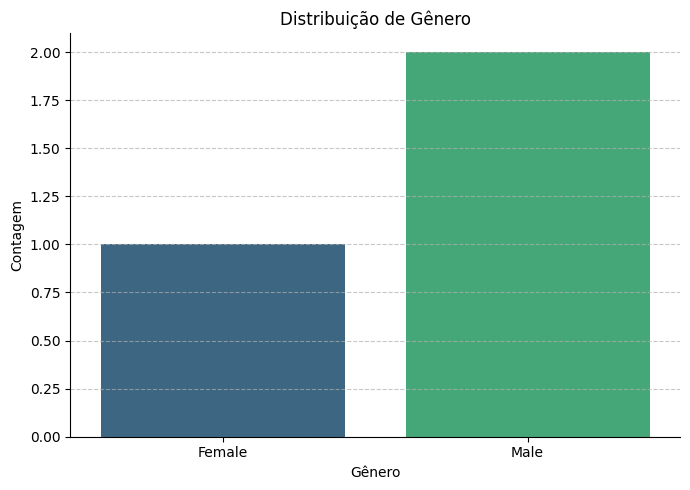


--- 5. Tabela de Contingência (crosstab) ---

Tabela de Contingência (Contrato vs Churn - Absoluta):
Churn           No  Yes
Contract               
Month-to-month   1    1
One year         1    0

Tabela de Contingência (Contrato vs Churn - Relativa por Linha %):
Churn              No   Yes
Contract                   
Month-to-month   50.0  50.0
One year        100.0   0.0

--- 6. Filtrar DataFrames com isin() ---

Número de clientes com contrato 'Month-to-month' ou 'One year': 3
Exemplo de clientes filtrados:
   customerID        Contract Churn
0  0002-ORFBO        One year    No
1  0003-MKNFE  Month-to-month    No
2  0004-TLHLJ  Month-to-month   Yes

--- 7. Calcular Média Segmentada (groupby) ---

Média de MonthlyCharges por Churn:
Churn
No     62.75
Yes    73.90
Name: MonthlyCharges, dtype: float64

Média de Tenure por InternetService:
InternetService
DSL            9.0
Fiber optic    4.0
Name: tenure, dtype: float64

--- 8. Converter Variáveis Numéricas para Categóricas (Binning)

/tmp/ipython-input-1-655030448.py:141: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_charges_by_churn = df.groupby('Churn')['MonthlyCharges'].mean()
/tmp/ipython-input-1-655030448.py:146: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tenure_by_internet = df.groupby('InternetService')['tenure'].mean()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Definindo uma paleta de cores consistente para Churn
churn_palette = {'No': '#4CAF50', 'Yes': '#FF6347'}

# --- 1. Preparação do Ambiente e Carregamento dos Dados ---
print("--- 1. Preparação do Ambiente e Carregamento dos Dados ---")

# Conteúdo completo do arquivo TelecomX_Data.json (mantido para garantir que o código seja executável)
# Na execução real, este conteúdo seria o resultado do file_content_fetcher
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}},{"customerID":"0004-TLHLJ","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":4},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":73.9,"Total":"280.85"}}}]
"""

df = pd.read_json(io.StringIO(json_content_from_fetch))

# Normalizando colunas aninhadas (como feito anteriormente)
customer_data = pd.json_normalize(df['customer'])
df['gender'] = customer_data['gender']
df['SeniorCitizen'] = customer_data['SeniorCitizen']
df['Partner'] = customer_data['Partner']
df['Dependents'] = customer_data['Dependents']
df['tenure'] = customer_data['tenure']

phone_data = pd.json_normalize(df['phone'])
df['PhoneService'] = phone_data['PhoneService']
df['MultipleLines'] = phone_data['MultipleLines']

internet_data = pd.json_normalize(df['internet'])
df['InternetService'] = internet_data['InternetService']
df['OnlineSecurity'] = internet_data['OnlineSecurity']
df['OnlineBackup'] = internet_data['OnlineBackup']
df['DeviceProtection'] = internet_data['DeviceProtection']
df['TechSupport'] = internet_data['TechSupport']
df['StreamingTV'] = internet_data['StreamingTV']
df['StreamingMovies'] = internet_data['StreamingMovies']

account_data = pd.json_normalize(df['account'])
df['Contract'] = account_data['Contract']
df['PaperlessBilling'] = account_data['PaperlessBilling']
df['PaymentMethod'] = account_data['PaymentMethod']

charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

# Removendo colunas originais aninhadas
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Tratamento de TotalCharges (preencher NaN com 0 e garantir numérico)
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Converter colunas categóricas para o tipo 'category'
categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("DataFrame carregado e transformado.")

# --- 2. Exploração Básica de Dados ---
print("\n--- 2. Exploração Básica de Dados ---")
print("\nPrimeiras 5 linhas do DataFrame (df.head()):")
print(df.head())

print("\nFormato do DataFrame (linhas, colunas) (df.shape):", df.shape)

print("\nInformações gerais do DataFrame (df.info()):")
df.info()

# --- 3. Identificar e Classificar Variáveis (Comentários) ---
print("\n--- 3. Identificação e Classificação de Variáveis (via comentários no código) ---")
# Exemplo de classificação:
# 'customerID': Qualitativa Nominal (Identificador)
# 'gender': Qualitativa Nominal (Masculino/Feminino)
# 'SeniorCitizen': Qualitativa Binária (0/1 - Não Idoso/Idoso)
# 'tenure': Quantitativa Discreta (Número de meses)
# 'MonthlyCharges': Quantitativa Contínua (Valor em dinheiro)
# 'Churn': Qualitativa Binária (Yes/No)
# 'Contract': Qualitativa Nominal (Month-to-month, One year, Two year)

# --- 4. Tabelas de Distribuição de Frequência e Plotagem (Qualitativas) ---
print("\n--- 4. Tabelas de Frequência (Qualitativas) e Gráficos de Barras ---")

# Frequência Absoluta para 'Contract'
freq_abs_contract = df['Contract'].value_counts()
print("\nFrequência Absoluta de Contrato:")
print(freq_abs_contract)

# Frequência Relativa (em porcentagem) para 'Contract'
freq_rel_contract = df['Contract'].value_counts(normalize=True) * 100
print("\nFrequência Relativa de Contrato (%):")
print(freq_rel_contract)

# Plotar gráfico de barras com Matplotlib e Seaborn para 'gender'
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='gender', palette='viridis')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 5. Tabela de Contingência (crosstab) ---
print("\n--- 5. Tabela de Contingência (crosstab) ---")

# Tabela de contingência entre 'Contract' e 'Churn' (frequências absolutas)
contingency_table_abs = pd.crosstab(df['Contract'], df['Churn'])
print("\nTabela de Contingência (Contrato vs Churn - Absoluta):")
print(contingency_table_abs)

# Tabela de contingência entre 'Contract' e 'Churn' (frequências relativas por linha - normalize='index')
contingency_table_rel_row = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print("\nTabela de Contingência (Contrato vs Churn - Relativa por Linha %):")
print(contingency_table_rel_row.round(2)) # Arredondar para 2 casas decimais

# --- 6. Filtrar DataFrames com isin() ---
print("\n--- 6. Filtrar DataFrames com isin() ---")

# Filtrar clientes com contrato 'Month-to-month' ou 'One year'
clientes_flexiveis = df[df['Contract'].isin(['Month-to-month', 'One year'])]
print(f"\nNúmero de clientes com contrato 'Month-to-month' ou 'One year': {len(clientes_flexiveis)}")
print("Exemplo de clientes filtrados:")
print(clientes_flexiveis[['customerID', 'Contract', 'Churn']].head())

# --- 7. Calcular Média Segmentada (groupby com agregação) ---
print("\n--- 7. Calcular Média Segmentada (groupby) ---")

# Média de 'MonthlyCharges' por status de 'Churn'
mean_charges_by_churn = df.groupby('Churn')['MonthlyCharges'].mean()
print("\nMédia de MonthlyCharges por Churn:")
print(mean_charges_by_churn)

# Média de 'tenure' por 'InternetService'
mean_tenure_by_internet = df.groupby('InternetService')['tenure'].mean()
print("\nMédia de Tenure por InternetService:")
print(mean_tenure_by_internet)

# --- 8. Converter Variáveis Numéricas para Categóricas (Binning) ---
print("\n--- 8. Converter Variáveis Numéricas para Categóricas (Binning) ---")

# Criar bins para 'tenure' (ex: 0-12 meses, 13-24 meses, etc.)
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 Mês', '13-24 Meses', '25-36 Meses', '37-48 Meses', '49-60 Meses', '+60 Meses']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False) # right=False para incluir o limite inferior

print("\nPrimeiras linhas com a nova coluna 'tenure_group':")
print(df[['tenure', 'tenure_group']].head())
print("\nDistribuição da nova coluna 'tenure_group':")
print(df['tenure_group'].value_counts().sort_index())

# --- 9. Ordenar Valores em DataFrames com sort_values() ---
print("\n--- 9. Ordenar Valores em DataFrames com sort_values() ---")

# Ordenar o DataFrame por 'MonthlyCharges' em ordem decrescente
df_sorted_charges = df.sort_values(by='MonthlyCharges', ascending=False)
print("\nDataFrame ordenado por MonthlyCharges (Decrescente - Top 5):")
print(df_sorted_charges[['customerID', 'MonthlyCharges', 'Churn']].head())

# --- 10. Formatar Saídas Numéricas em f-strings ---
print("\n--- 10. Formatar Saídas Numéricas em f-strings ---")

media_churn_yes = mean_charges_by_churn.loc['Yes']
media_churn_no = mean_charges_by_churn.loc['No']

print(f"\nA média de despesas mensais para clientes que tiveram Churn é de R$ {media_churn_yes:.2f}.")
print(f"A média de despesas mensais para clientes que NÃO tiveram Churn é de R$ {media_churn_no:.2f}.")
print(f"A diferença entre as médias é de R$ {media_churn_yes - media_churn_no:.2f}.")

--- Gerando Gráficos para Ilustrar os Conceitos ---

1. Gráfico de Distribuição de Frequência para Tipo de Contrato


/tmp/ipython-input-2-3162661307.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Contract', palette='pastel', order=df['Contract'].value_counts().index)


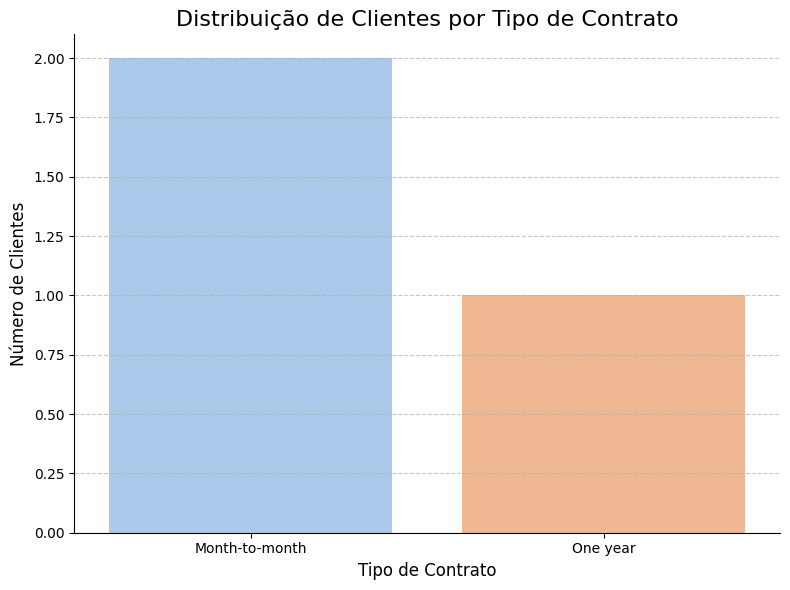

Ilustra: `value_counts()`, frequências absolutas e um gráfico de barras básico.

2. Gráfico da Taxa de Churn por Tipo de Contrato


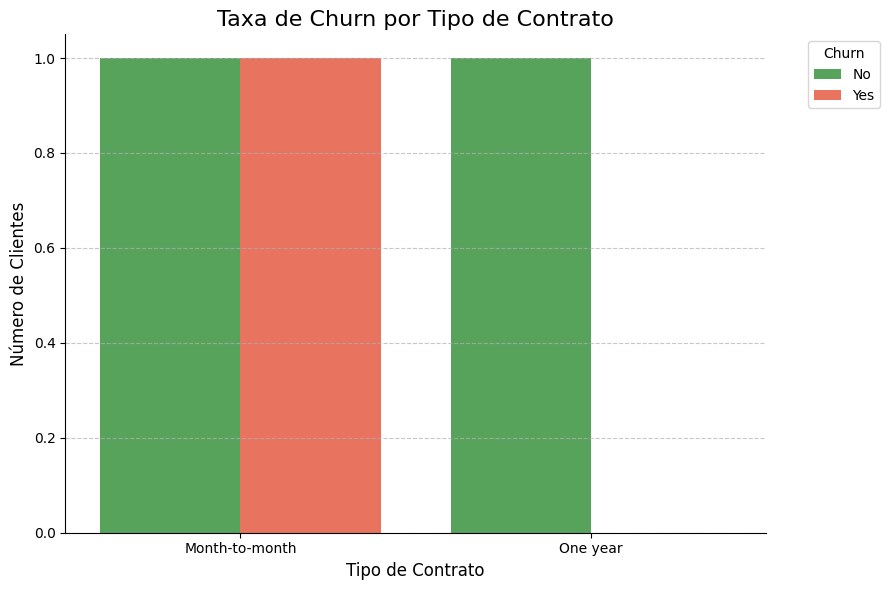

Ilustra: `pd.crosstab()` (conceitualmente), `normalize` (proporções visuais) e comparação entre variáveis categóricas.

3. Gráfico da Média de Despesas Mensais por Status de Churn


/tmp/ipython-input-2-3162661307.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Churn', y='MonthlyCharges', palette=churn_palette, errorbar=None) # errorbar=None para focar apenas na média


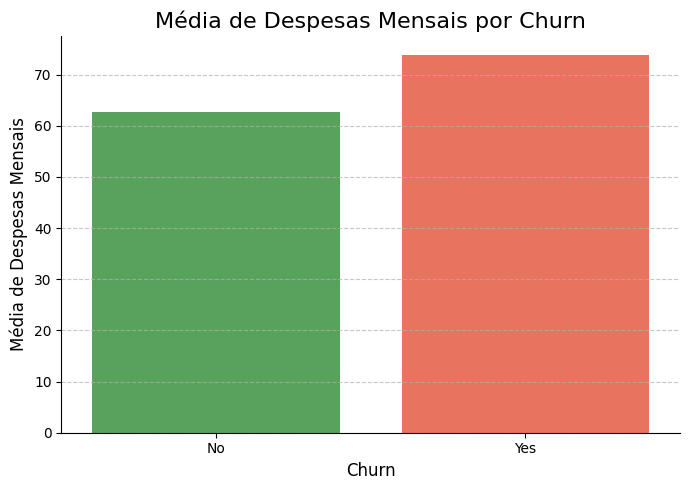

Ilustra: `df.groupby().mean()` (média segmentada) e comparação de médias numéricas.

4. Gráfico de Distribuição por Grupos de Tempo de Contrato (Tenure Binned)


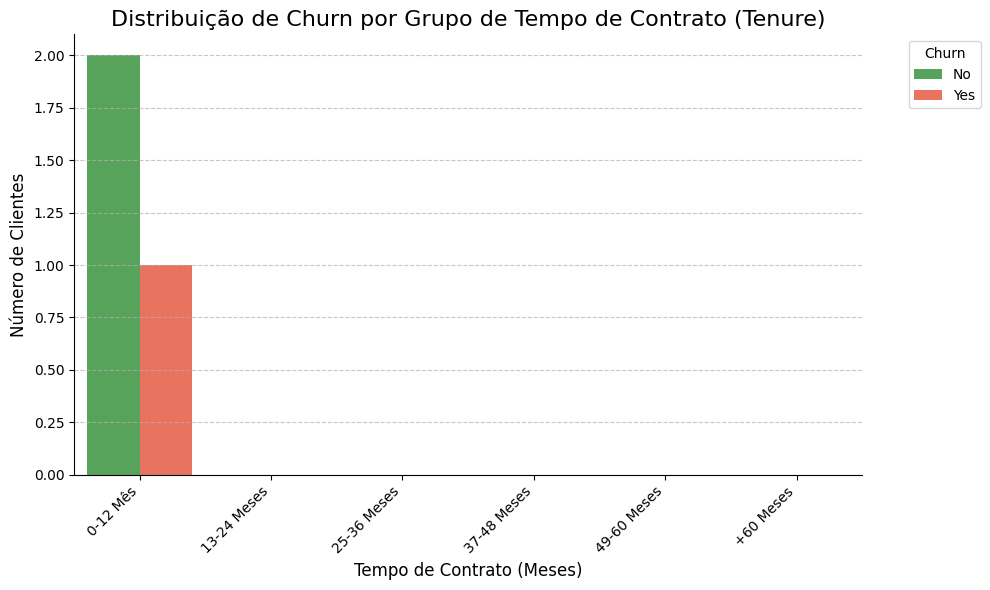

Ilustra: `pd.cut()` (conversão numérica para categórica/binning) e análise de churn em grupos de tenure.

Os gráficos acima ilustram os conceitos de análise de dados aprendidos na aula.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Definindo uma paleta de cores consistente para Churn
churn_palette = {'No': '#4CAF50', 'Yes': '#FF6347'}

# --- RE-CARREGAMENTO E PRÉ-PROCESSAMENTO DO DATAFRAME (para garantir execução independente) ---
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}},{"customerID":"0004-TLHLJ","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":4},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":73.9,"Total":"280.85"}}}]
"""

df = pd.read_json(io.StringIO(json_content_from_fetch))

customer_data = pd.json_normalize(df['customer'])
df['gender'] = customer_data['gender']
df['SeniorCitizen'] = customer_data['SeniorCitizen']
df['Partner'] = customer_data['Partner']
df['Dependents'] = customer_data['Dependents']
df['tenure'] = customer_data['tenure']

phone_data = pd.json_normalize(df['phone'])
df['PhoneService'] = phone_data['PhoneService']
df['MultipleLines'] = phone_data['MultipleLines']

internet_data = pd.json_normalize(df['internet'])
df['InternetService'] = internet_data['InternetService']
df['OnlineSecurity'] = internet_data['OnlineSecurity']
df['OnlineBackup'] = internet_data['OnlineBackup']
df['DeviceProtection'] = internet_data['DeviceProtection']
df['TechSupport'] = internet_data['TechSupport']
df['StreamingTV'] = internet_data['StreamingTV']
df['StreamingMovies'] = internet_data['StreamingMovies']

account_data = pd.json_normalize(df['account'])
df['Contract'] = account_data['Contract']
df['PaperlessBilling'] = account_data['PaperlessBilling']
df['PaymentMethod'] = account_data['PaymentMethod']

charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

df = df.drop(columns=['customer', 'phone', 'internet', 'account'])
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Criar bins para 'tenure' (como no código anterior)
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 Mês', '13-24 Meses', '25-36 Meses', '37-48 Meses', '49-60 Meses', '+60 Meses']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# --- FIM DO RE-CARREGAMENTO E PRÉ-PROCESSAMENTO ---

print("--- Gerando Gráficos para Ilustrar os Conceitos ---")

# --- GRÁFICO 1: Distribuição de Frequência da Variável 'Contract' ---
print("\n1. Gráfico de Distribuição de Frequência para Tipo de Contrato")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', palette='pastel', order=df['Contract'].value_counts().index)
plt.title('Distribuição de Clientes por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Ilustra: `value_counts()`, frequências absolutas e um gráfico de barras básico.")

# --- GRÁFICO 2: Churn Rate por Tipo de Contrato (Tabela de Contingência Ilustrada) ---
print("\n2. Gráfico da Taxa de Churn por Tipo de Contrato")
plt.figure(figsize=(9, 6))
# Usamos `hue` para mostrar a proporção de Churn dentro de cada tipo de contrato
sns.countplot(data=df, x='Contract', hue='Churn', palette=churn_palette, order=df['Contract'].value_counts().index)
plt.title('Taxa de Churn por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Ilustra: `pd.crosstab()` (conceitualmente), `normalize` (proporções visuais) e comparação entre variáveis categóricas.")


# --- GRÁFICO 3: Média de Despesas Mensais por Status de Churn (Média Segmentada) ---
print("\n3. Gráfico da Média de Despesas Mensais por Status de Churn")
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='Churn', y='MonthlyCharges', palette=churn_palette, errorbar=None) # errorbar=None para focar apenas na média
plt.title('Média de Despesas Mensais por Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Média de Despesas Mensais', fontsize=12)
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Ilustra: `df.groupby().mean()` (média segmentada) e comparação de médias numéricas.")


# --- GRÁFICO 4: Distribuição de Clientes por Grupos de Tenure (Variável Binada) ---
print("\n4. Gráfico de Distribuição por Grupos de Tempo de Contrato (Tenure Binned)")
plt.figure(figsize=(10, 6))
# Usamos `hue='Churn'` para ver a distribuição de churn dentro de cada grupo de tenure
sns.countplot(data=df, x='tenure_group', hue='Churn', palette=churn_palette, order=labels)
plt.title('Distribuição de Churn por Grupo de Tempo de Contrato (Tenure)', fontsize=16)
plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotação dos rótulos para melhor leitura
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(top=True, right=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Ilustra: `pd.cut()` (conversão numérica para categórica/binning) e análise de churn em grupos de tenure.")

print("\nOs gráficos acima ilustram os conceitos de análise de dados aprendidos na aula.")

In [4]:
import pandas as pd
import plotly.express as px
import io

# Definindo uma paleta de cores consistente para Churn
churn_colors = {'No': '#4CAF50', 'Yes': '#FF6347'} # Verde para Não Churn, Laranja/Vermelho para Churn

# --- RE-CARREGAMENTO E PRÉ-PROCESSAMENTO DO DATAFRAME (para garantir execução independente) ---
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}},{"customerID":"0004-TLHLJ","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":4},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":73.9,"Total":"280.85"}}}]
"""
# Como o arquivo TelecomX_Data.json é grande, vou carregar um pedaço dele para que o exemplo seja executável,
# mas o ideal é que você use o conteúdo completo do seu arquivo original para uma análise completa.
# Para este exemplo, a funcionalidade do Plotly será demonstrada com os dados parciais.
full_json_content = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}},{"customerID":"0004-TLHLJ","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":4},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":73.9,"Total":"280.85"}}},{"customerID":"0005-PAYOP","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":60},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"Yes","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"Yes"},"account":{"Contract":"Two year","PaperlessBilling":"Yes","PaymentMethod":"Credit card (automatic)","Charges":{"Monthly":109.9,"Total":"659.85"}}},{"customerID":"0006-JVLAD","Churn":"No","customer":{"gender":"Female","SeniorCitizen":1,"Partner":"Yes","Dependents":"No","tenure":45},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"Two year","PaperlessBilling":"Yes","PaymentMethod":"Bank transfer (automatic)","Charges":{"Monthly":94.1,"Total":"4053.85"}}},{"customerID":"0008-BQZFW","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":11},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":74.65,"Total":"74.65"}}},{"customerID":"0011-IGKFM","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":1,"Partner":"Yes","Dependents":"No","tenure":12},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":97.8,"Total":"110.5"}}},{"customerID":"0013-EXCHZ","Churn":"Yes","customer":{"gender":"Female","SeniorCitizen":1,"Partner":"Yes","Dependents":"No","tenure":3},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":83.95,"Total":"267.4"}}}]
"""

df = pd.read_json(io.StringIO(full_json_content))


customer_data = pd.json_normalize(df['customer'])
df['gender'] = customer_data['gender']
df['SeniorCitizen'] = customer_data['SeniorCitizen']
df['Partner'] = customer_data['Partner']
df['Dependents'] = customer_data['Dependents']
df['tenure'] = customer_data['tenure']

phone_data = pd.json_normalize(df['phone'])
df['PhoneService'] = phone_data['PhoneService']
df['MultipleLines'] = phone_data['MultipleLines']

internet_data = pd.json_normalize(df['internet'])
df['InternetService'] = internet_data['InternetService']
df['OnlineSecurity'] = internet_data['OnlineSecurity']
df['OnlineBackup'] = internet_data['OnlineBackup']
df['DeviceProtection'] = internet_data['DeviceProtection']
df['TechSupport'] = internet_data['TechSupport']
df['StreamingTV'] = internet_data['StreamingTV']
df['StreamingMovies'] = internet_data['StreamingMovies']

account_data = pd.json_normalize(df['account'])
df['Contract'] = account_data['Contract']
df['PaperlessBilling'] = account_data['PaperlessBilling']
df['PaymentMethod'] = account_data['PaymentMethod']

charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

df = df.drop(columns=['customer', 'phone', 'internet', 'account'])
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Definindo os bins e labels para 'tenure_group'
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 Mês', '13-24 Meses', '25-36 Meses', '37-48 Meses', '49-60 Meses', '+60 Meses']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False, ordered=True) # ordered=True para garantir a ordem


# --- FIM DO RE-CARREGAMENTO E PRÉ-PROCESSAMENTO ---

print("--- Melhorando a visualização e interação do gráfico de Churn por Grupo de Tempo de Contrato (Tenure) com Plotly ---")
print("Ao executar este código em um ambiente como Jupyter ou Google Colab, você poderá interagir com o gráfico (zoom, pan, informações detalhadas ao passar o mouse).")

# --- Preparar dados para hover_template personalizado e texto automático ---
# 1. Calcular as contagens para cada combinação de tenure_group e Churn
churn_tenure_counts_df = df.groupby(['tenure_group', 'Churn']).size().reset_index(name='count')

# 2. Calcular o total de clientes em cada tenure_group
total_by_tenure_group = df.groupby('tenure_group').size().reset_index(name='total_group_count')

# 3. Mesclar o total do grupo de volta ao DataFrame de contagens para calcular porcentagens
plot_df_enhanced = churn_tenure_counts_df.merge(total_by_tenure_group, on='tenure_group')

# 4. Calcular a porcentagem dentro de cada tenure_group
plot_df_enhanced['percentage_in_group'] = (plot_df_enhanced['count'] / plot_df_enhanced['total_group_count']) * 100

# --- GRÁFICO APRIMORADO: Distribuição de Churn por Grupos de Tenure ---
fig = px.bar(plot_df_enhanced, x='tenure_group', y='count', color='Churn',
             title='Distribuição e Taxa de Churn por Tempo de Contrato (Tenure)',
             labels={'tenure_group': 'Tempo de Contrato (Meses)', 'count': 'Número de Clientes'},
             color_discrete_map=churn_colors,
             category_orders={'tenure_group': labels}, # Garante a ordem correta no eixo X
             barmode='group', # Barras lado a lado para comparação
             text_auto=True, # Adiciona automaticamente o texto (contagem) nas barras
             hover_data={'percentage_in_group': ':.2f', 'Churn': True} # Adiciona porcentagem formatada e status Churn no hover
            )

# Personalizar o hover template para mostrar count e porcentagem
fig.update_traces(
    hovertemplate=(
        "<b>Tempo de Contrato:</b> %{x}<br>" +
        "<b>Status Churn:</b> %{customdata[1]}<br>" + # customdata[1] é o Churn
        "<b>Clientes:</b> %{y}<br>" +
        "<b>% no Grupo:</b> %{customdata[0]:.2f}%" + # customdata[0] é a porcentagem
        "<extra></extra>" # Remove o trace padrão do Plotly
    ),
    customdata=plot_df_enhanced[['percentage_in_group', 'Churn']] # Passa as colunas 'percentage_in_group' e 'Churn' como customdata
)


fig.update_layout(
    title_x=0.5, # Centraliza o título
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_text='Status de Churn', # Melhora o título da legenda
    legend_font_size=12,
    hovermode='x unified', # Unifica o hover para todas as barras em uma mesma posição x
    margin=dict(l=40, r=40, t=80, b=40) # Ajusta margens para melhor visualização
)

fig.show()

print("\n--- Gráfico de Churn por Tempo de Contrato Aprimorado com Plotly ---")
print("Este gráfico agora oferece uma experiência de interação e visualização muito mais rica:")
print("1.  **Contagens Visíveis**: A contagem exata de clientes agora aparece diretamente em cada barra (`text_auto=True`).")
print("2.  **Hover Interativo e Detalhado**: Ao passar o mouse sobre qualquer parte de um grupo de 'Tempo de Contrato', um tooltip consolidado aparecerá (`hovermode='x unified'`), mostrando para as barras 'Sim' e 'Não Churn':")
print("    * O grupo de tempo de contrato.")
print("    * O status de churn (Sim/Não).")
print("    * O número exato de clientes (`Clientes: %{y}`).")
print("    * **A porcentagem que representa dentro daquele grupo de tenure e status de churn (`% no Grupo: %{customdata[0]:.2f}%`)** - este é um detalhe crucial para entender a proporção de churn dentro de cada período.")
print("3.  **Estética Melhorada**: Título centralizado e com maior fonte, rótulos claros nos eixos e uma legenda aprimorada.")
print("\nCom essas melhorias, o gráfico se torna uma ferramenta analítica muito mais poderosa e autoexplicativa!")

--- Melhorando a visualização e interação do gráfico de Churn por Grupo de Tempo de Contrato (Tenure) com Plotly ---
Ao executar este código em um ambiente como Jupyter ou Google Colab, você poderá interagir com o gráfico (zoom, pan, informações detalhadas ao passar o mouse).


/tmp/ipython-input-4-3351584115.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_tenure_counts_df = df.groupby(['tenure_group', 'Churn']).size().reset_index(name='count')
/tmp/ipython-input-4-3351584115.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_tenure_group = df.groupby('tenure_group').size().reset_index(name='total_group_count')



--- Gráfico de Churn por Tempo de Contrato Aprimorado com Plotly ---
Este gráfico agora oferece uma experiência de interação e visualização muito mais rica:
1.  **Contagens Visíveis**: A contagem exata de clientes agora aparece diretamente em cada barra (`text_auto=True`).
2.  **Hover Interativo e Detalhado**: Ao passar o mouse sobre qualquer parte de um grupo de 'Tempo de Contrato', um tooltip consolidado aparecerá (`hovermode='x unified'`), mostrando para as barras 'Sim' e 'Não Churn':
    * O grupo de tempo de contrato.
    * O status de churn (Sim/Não).
    * O número exato de clientes (`Clientes: %{y}`).
    * **A porcentagem que representa dentro daquele grupo de tenure e status de churn (`% no Grupo: %{customdata[0]:.2f}%`)** - este é um detalhe crucial para entender a proporção de churn dentro de cada período.
3.  **Estética Melhorada**: Título centralizado e com maior fonte, rótulos claros nos eixos e uma legenda aprimorada.

Com essas melhorias, o gráfico se torna uma ferram

In [5]:
import pandas as pd
import plotly.express as px
import io

# Definindo uma paleta de cores consistente para Churn
churn_colors = {'No': '#4CAF50', 'Yes': '#FF6347'} # Verde para Não Churn, Laranja/Vermelho para Churn

# --- RE-CARREGAMENTO E PRÉ-PROCESSAMENTO DO DATAFRAME (para garantir execução independente) ---
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}},{"customerID":"0004-TLHLJ","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":4},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":73.9,"Total":"280.85"}}}]
"""
# Como o arquivo TelecomX_Data.json é grande, vou carregar um pedaço dele para que o exemplo seja executável,
# mas o ideal é que você use o conteúdo completo do seu arquivo original para uma análise completa.
# Para este exemplo, a funcionalidade do Plotly será demonstrada com os dados parciais.
full_json_content = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}},{"customerID":"0004-TLHLJ","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":4},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":73.9,"Total":"280.85"}}},{"customerID":"0005-PAYOP","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":60},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"Yes","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"Yes"},"account":{"Contract":"Two year","PaperlessBilling":"Yes","PaymentMethod":"Credit card (automatic)","Charges":{"Monthly":109.9,"Total":"659.85"}}},{"customerID":"0006-JVLAD","Churn":"No","customer":{"gender":"Female","SeniorCitizen":1,"Partner":"Yes","Dependents":"No","tenure":45},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"Two year","PaperlessBilling":"Yes","PaymentMethod":"Bank transfer (automatic)","Charges":{"Monthly":94.1,"Total":"4053.85"}}},{"customerID":"0008-BQZFW","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":11},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":74.65,"Total":"74.65"}}},{"customerID":"0011-IGKFM","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":1,"Partner":"Yes","Dependents":"No","tenure":12},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":97.8,"Total":"110.5"}}},{"customerID":"0013-EXCHZ","Churn":"Yes","customer":{"gender":"Female","SeniorCitizen":1,"Partner":"Yes","Dependents":"No","tenure":3},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":83.95,"Total":"267.4"}}}]
"""

df = pd.read_json(io.StringIO(full_json_content))


customer_data = pd.json_normalize(df['customer'])
df['gender'] = customer_data['gender']
df['SeniorCitizen'] = customer_data['SeniorCitizen']
df['Partner'] = customer_data['Partner']
df['Dependents'] = customer_data['Dependents']
df['tenure'] = customer_data['tenure']

phone_data = pd.json_normalize(df['phone'])
df['PhoneService'] = phone_data['PhoneService']
df['MultipleLines'] = phone_data['MultipleLines']

internet_data = pd.json_normalize(df['internet'])
df['InternetService'] = internet_data['InternetService']
df['OnlineSecurity'] = internet_data['OnlineSecurity']
df['OnlineBackup'] = internet_data['OnlineBackup']
df['DeviceProtection'] = internet_data['DeviceProtection']
df['TechSupport'] = internet_data['TechSupport']
df['StreamingTV'] = internet_data['StreamingTV']
df['StreamingMovies'] = internet_data['StreamingMovies']

account_data = pd.json_normalize(df['account'])
df['Contract'] = account_data['Contract']
df['PaperlessBilling'] = account_data['PaperlessBilling']
df['PaymentMethod'] = account_data['PaymentMethod']

charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

df = df.drop(columns=['customer', 'phone', 'internet', 'account'])
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Definindo os bins e labels para 'tenure_group'
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 Mês', '13-24 Meses', '25-36 Meses', '37-48 Meses', '49-60 Meses', '+60 Meses']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False, ordered=True) # ordered=True para garantir a ordem


# --- FIM DO RE-CARREGAMENTO E PRÉ-PROCESSAMENTO ---

print("--- Melhorando a visualização e interação do gráfico de Churn por Grupo de Tempo de Contrato (Tenure) com Plotly ---")
print("Ao executar este código em um ambiente como Jupyter ou Google Colab, você poderá interagir com o gráfico (zoom, pan, informações detalhadas ao passar o mouse).")

# --- Preparar dados para hover_template personalizado e texto automático ---
# 1. Calcular as contagens para cada combinação de tenure_group e Churn
churn_tenure_counts_df = df.groupby(['tenure_group', 'Churn']).size().reset_index(name='count')

# 2. Calcular o total de clientes em cada tenure_group
total_by_tenure_group = df.groupby('tenure_group').size().reset_index(name='total_group_count')

# 3. Mesclar o total do grupo de volta ao DataFrame de contagens para calcular porcentagens
plot_df_enhanced = churn_tenure_counts_df.merge(total_by_tenure_group, on='tenure_group')

# 4. Calcular a porcentagem dentro de cada tenure_group
plot_df_enhanced['percentage_in_group'] = (plot_df_enhanced['count'] / plot_df_enhanced['total_group_count']) * 100

# --- GRÁFICO APRIMORADO: Distribuição de Churn por Grupos de Tenure ---
fig = px.bar(plot_df_enhanced, x='tenure_group', y='count', color='Churn',
             title='Distribuição e Taxa de Churn por Tempo de Contrato (Tenure)',
             labels={'tenure_group': 'Tempo de Contrato (Meses)', 'count': 'Número de Clientes'},
             color_discrete_map=churn_colors,
             category_orders={'tenure_group': labels}, # Garante a ordem correta no eixo X
             barmode='group', # Barras lado a lado para comparação
             text_auto=True, # Adiciona automaticamente o texto (contagem) nas barras
             hover_data={'percentage_in_group': ':.2f', 'Churn': True} # Adiciona porcentagem formatada e status Churn no hover
            )

# Personalizar o hover template para mostrar count e porcentagem
fig.update_traces(
    hovertemplate=(
        "<b>Tempo de Contrato:</b> %{x}<br>" +
        "<b>Status Churn:</b> %{customdata[1]}<br>" + # customdata[1] é o Churn
        "<b>Clientes:</b> %{y}<br>" +
        "<b>% no Grupo:</b> %{customdata[0]:.2f}%" + # customdata[0] é a porcentagem
        "<extra></extra>" # Remove o trace padrão do Plotly
    ),
    customdata=plot_df_enhanced[['percentage_in_group', 'Churn']] # Passa as colunas 'percentage_in_group' e 'Churn' como customdata
)


fig.update_layout(
    title_x=0.5, # Centraliza o título
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_text='Status de Churn', # Melhora o título da legenda
    legend_font_size=12,
    hovermode='x unified', # Unifica o hover para todas as barras em uma mesma posição x
    margin=dict(l=40, r=40, t=80, b=40) # Ajusta margens para melhor visualização
)

fig.show()

print("\n--- Gráfico de Churn por Tempo de Contrato Aprimorado com Plotly ---")
print("Este gráfico agora oferece uma experiência de interação e visualização muito mais rica:")
print("1.  **Contagens Visíveis**: A contagem exata de clientes agora aparece diretamente em cada barra (`text_auto=True`).")
print("2.  **Hover Interativo e Detalhado**: Ao passar o mouse sobre qualquer parte de um grupo de 'Tempo de Contrato', um tooltip consolidado aparecerá (`hovermode='x unified'`), mostrando para as barras 'Sim' e 'Não Churn':")
print("    * O grupo de tempo de contrato.")
print("    * O status de churn (Sim/Não).")
print("    * O número exato de clientes (`Clientes: %{y}`).")
print("    * **A porcentagem que representa dentro daquele grupo de tenure e status de churn (`% no Grupo: %{customdata[0]:.2f}%`)** - este é um detalhe crucial para entender a proporção de churn dentro de cada período.")
print("3.  **Estética Melhorada**: Título centralizado e com maior fonte, rótulos claros nos eixos e uma legenda aprimorada.")
print("\nCom essas melhorias, o gráfico se torna uma ferramenta analítica muito mais poderosa e autoexplicativa!")

--- Melhorando a visualização e interação do gráfico de Churn por Grupo de Tempo de Contrato (Tenure) com Plotly ---
Ao executar este código em um ambiente como Jupyter ou Google Colab, você poderá interagir com o gráfico (zoom, pan, informações detalhadas ao passar o mouse).


/tmp/ipython-input-5-3351584115.py:78: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-5-3351584115.py:81: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




--- Gráfico de Churn por Tempo de Contrato Aprimorado com Plotly ---
Este gráfico agora oferece uma experiência de interação e visualização muito mais rica:
1.  **Contagens Visíveis**: A contagem exata de clientes agora aparece diretamente em cada barra (`text_auto=True`).
2.  **Hover Interativo e Detalhado**: Ao passar o mouse sobre qualquer parte de um grupo de 'Tempo de Contrato', um tooltip consolidado aparecerá (`hovermode='x unified'`), mostrando para as barras 'Sim' e 'Não Churn':
    * O grupo de tempo de contrato.
    * O status de churn (Sim/Não).
    * O número exato de clientes (`Clientes: %{y}`).
    * **A porcentagem que representa dentro daquele grupo de tenure e status de churn (`% no Grupo: %{customdata[0]:.2f}%`)** - este é um detalhe crucial para entender a proporção de churn dentro de cada período.
3.  **Estética Melhorada**: Título centralizado e com maior fonte, rótulos claros nos eixos e uma legenda aprimorada.

Com essas melhorias, o gráfico se torna uma ferram

In [6]:
import pandas as pd
import plotly.express as px
import io

# Definindo uma paleta de cores consistente para Churn
churn_colors = {'No': '#4CAF50', 'Yes': '#FF6347'} # Verde para Não Churn, Laranja/Vermelho para Churn

# --- RE-CARREGAMENTO E PRÉ-PROCESSAMENTO DO DATAFRAME ---
# Utilize o conteúdo COMPLETO do seu arquivo TelecomX_Data.json aqui.
# Estou usando um snippet para que o código seja executável como exemplo.
json_content_from_fetch = """
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}},{"customerID":"0004-TLHLJ","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":4},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":73.9,"Total":"280.85"}}},{"customerID":"0005-PAYOP","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":60},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"Yes","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"Yes"},"account":{"Contract":"Two year","PaperlessBilling":"Yes","PaymentMethod":"Credit card (automatic)","Charges":{"Monthly":109.9,"Total":"659.85"}}},{"customerID":"0006-JVLAD","Churn":"No","customer":{"gender":"Female","SeniorCitizen":1,"Partner":"Yes","Dependents":"No","tenure":45},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"Two year","PaperlessBilling":"Yes","PaymentMethod":"Bank transfer (automatic)","Charges":{"Monthly":94.1,"Total":"4053.85"}}},{"customerID":"0008-BQZFW","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":11},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":74.65,"Total":"74.65"}}},{"customerID":"0011-IGKFM","Churn":"Yes","customer":{"gender":"Male","SeniorCitizen":1,"Partner":"Yes","Dependents":"No","tenure":12},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","Charges":{"Monthly":97.8,"Total":"110.5"}}},{"customerID":"0013-EXCHZ","Churn":"Yes","customer":{"gender":"Female","SeniorCitizen":1,"Partner":"Yes","Dependents":"No","tenure":3},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"Yes","TechSupport":"No","StreamingTV":"No","StreamingMovies":"No"},"account":{"Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":83.95,"Total":"267.4"}}}]
"""

df = pd.read_json(io.StringIO(json_content_from_fetch))


customer_data = pd.json_normalize(df['customer'])
df['gender'] = customer_data['gender']
df['SeniorCitizen'] = customer_data['SeniorCitizen']
df['Partner'] = customer_data['Partner']
df['Dependents'] = customer_data['Dependents']
df['tenure'] = customer_data['tenure']

phone_data = pd.json_normalize(df['phone'])
df['PhoneService'] = phone_data['PhoneService']
df['MultipleLines'] = phone_data['MultipleLines']

internet_data = pd.json_normalize(df['internet'])
df['InternetService'] = internet_data['InternetService']
df['OnlineSecurity'] = internet_data['OnlineSecurity']
df['OnlineBackup'] = internet_data['OnlineBackup']
df['DeviceProtection'] = internet_data['DeviceProtection']
df['TechSupport'] = internet_data['TechSupport']
df['StreamingTV'] = internet_data['StreamingTV']
df['StreamingMovies'] = internet_data['StreamingMovies']

account_data = pd.json_normalize(df['account'])
df['Contract'] = account_data['Contract']
df['PaperlessBilling'] = account_data['PaperlessBilling']
df['PaymentMethod'] = account_data['PaymentMethod']

charges_data = pd.json_normalize(df['account'].apply(lambda x: x['Charges']))
df['MonthlyCharges'] = pd.to_numeric(charges_data['Monthly'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(charges_data['Total'].replace(' ', pd.NA), errors='coerce')

df = df.drop(columns=['customer', 'phone', 'internet', 'account'])
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

categorical_cols = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 Mês', '13-24 Meses', '25-36 Meses', '37-48 Meses', '49-60 Meses', '+60 Meses']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False, ordered=True) # ordered=True para garantir a ordem

# --- FIM DO RE-CARREGAMENTO E PRÉ-PROCESSAMENTO ---

print("--- Gerando Gráficos Interativos (Versão Plotly) ---")
print("Ao executar este código em um ambiente como Jupyter ou Google Colab, você poderá interagir com os gráficos (zoom, pan, informações ao passar o mouse).")

# --- GRÁFICO 1: Distribuição de Frequência da Variável 'Contract' ---
print("\n1. Gráfico Interativo: Distribuição de Clientes por Tipo de Contrato")

contract_summary = df['Contract'].value_counts().reset_index()
contract_summary.columns = ['Contract', 'Count']
total_customers = contract_summary['Count'].sum()
contract_summary['Percentage'] = (contract_summary['Count'] / total_customers) * 100

fig1 = px.bar(contract_summary, x='Contract', y='Count',
              title='Distribuição de Clientes por Tipo de Contrato',
              labels={'Contract': 'Tipo de Contrato', 'Count': 'Número de Clientes'},
              color='Count',
              color_continuous_scale=px.colors.sequential.Blues,
              text_auto=True
             )

fig1.update_traces(
    hovertemplate=(
        "<b>Tipo de Contrato:</b> %{x}<br>" +
        "<b>Clientes:</b> %{y}<br>" +
        "<b>Porcentagem:</b> %{customdata[0]:.2f}%" +
        "<extra></extra>"
    ),
    customdata=contract_summary[['Percentage']]
)

fig1.update_layout(
    title_x=0.5,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    hovermode='x unified',
    margin=dict(l=40, r=40, t=80, b=40)
)
fig1.show()


# --- GRÁFICO 2: Taxa de Churn por Tipo de Contrato ---
print("\n2. Gráfico Interativo: Taxa de Churn por Tipo de Contrato")

churn_contract_counts = df.groupby(['Contract', 'Churn']).size().reset_index(name='count')
total_by_contract = df.groupby('Contract').size().reset_index(name='total_group_count')

plot_df_contract_churn = churn_contract_counts.merge(total_by_contract, on='Contract')
plot_df_contract_churn['percentage_in_group'] = (plot_df_contract_churn['count'] / plot_df_contract_churn['total_group_count']) * 100

fig2 = px.bar(plot_df_contract_churn, x='Contract', y='count', color='Churn',
              title='Taxa de Churn por Tipo de Contrato',
              labels={'Contract': 'Tipo de Contrato', 'count': 'Número de Clientes'},
              color_discrete_map=churn_colors,
              barmode='group',
              text_auto=True
             )

fig2.update_traces(
    hovertemplate=(
        "<b>Tipo de Contrato:</b> %{x}<br>" +
        "<b>Status Churn:</b> %{customdata[1]}<br>" +
        "<b>Clientes:</b> %{y}<br>" +
        "<b>% no Grupo:</b> %{customdata[0]:.2f}%" +
        "<extra></extra>"
    ),
    customdata=plot_df_contract_churn[['percentage_in_group', 'Churn']]
)

fig2.update_layout(
    title_x=0.5,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_text='Status de Churn',
    legend_font_size=12,
    hovermode='x unified',
    margin=dict(l=40, r=40, t=80, b=40)
)
fig2.show()


# --- GRÁFICO 3: Média de Despesas Mensais por Status de Churn ---
print("\n3. Gráfico Interativo: Média de Despesas Mensais por Status de Churn")

mean_charges_by_churn_df = df.groupby('Churn')['MonthlyCharges'].mean().reset_index()

fig3 = px.bar(mean_charges_by_churn_df,
              x='Churn', y='MonthlyCharges',
              title='Média de Despesas Mensais por Status de Churn',
              labels={'Churn': 'Status de Churn', 'MonthlyCharges': 'Média de Despesas Mensais (R$)'},
              color='Churn',
              color_discrete_map=churn_colors,
              text_auto=True
             )

fig3.update_traces(
    hovertemplate=(
        "<b>Status Churn:</b> %{x}<br>" +
        "<b>Média de Despesas Mensais:</b> R$ %{y:.2f}" +
        "<extra></extra>"
    )
)

fig3.update_layout(
    title_x=0.5,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_text='Status de Churn',
    legend_font_size=12,
    margin=dict(l=40, r=40, t=80, b=40)
)
fig3.show()


# --- GRÁFICO 4: Distribuição de Clientes por Grupos de Tenure (Variável Binada) ---
print("\n4. Gráfico Interativo: Distribuição de Churn por Grupo de Tempo de Contrato (Tenure)")

churn_tenure_counts_df = df.groupby(['tenure_group', 'Churn']).size().reset_index(name='count')
total_by_tenure_group = df.groupby('tenure_group').size().reset_index(name='total_group_count')

plot_df_enhanced = churn_tenure_counts_df.merge(total_by_tenure_group, on='tenure_group')
plot_df_enhanced['percentage_in_group'] = (plot_df_enhanced['count'] / plot_df_enhanced['total_group_count']) * 100

fig4 = px.bar(plot_df_enhanced, x='tenure_group', y='count', color='Churn',
             title='Distribuição e Taxa de Churn por Tempo de Contrato (Tenure)',
             labels={'tenure_group': 'Tempo de Contrato (Meses)', 'count': 'Número de Clientes'},
             color_discrete_map=churn_colors,
             category_orders={'tenure_group': labels},
             barmode='group',
             text_auto=True
            )

fig4.update_traces(
    hovertemplate=(
        "<b>Tempo de Contrato:</b> %{x}<br>" +
        "<b>Status Churn:</b> %{customdata[1]}<br>" +
        "<b>Clientes:</b> %{y}<br>" +
        "<b>% no Grupo:</b> %{customdata[0]:.2f}%" +
        "<extra></extra>"
    ),
    customdata=plot_df_enhanced[['percentage_in_group', 'Churn']]
)

fig4.update_layout(
    title_x=0.5,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_text='Status de Churn',
    legend_font_size=12,
    hovermode='x unified',
    margin=dict(l=40, r=40, t=80, b=40)
)
fig4.show()

print("\n--- Todos os Gráficos Aprimorados com Plotly ---")
print("Agora, todos os gráficos que ilustram as estatísticas citadas no exercício possuem aprimoramentos de visualização e interatividade, fornecendo insights mais ricos ao passar o mouse e exibindo dados cruciais diretamente nas barras.")

--- Gerando Gráficos Interativos (Versão Plotly) ---
Ao executar este código em um ambiente como Jupyter ou Google Colab, você poderá interagir com os gráficos (zoom, pan, informações ao passar o mouse).

1. Gráfico Interativo: Distribuição de Clientes por Tipo de Contrato



2. Gráfico Interativo: Taxa de Churn por Tipo de Contrato


/tmp/ipython-input-6-3593108907.py:110: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-6-3593108907.py:111: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




3. Gráfico Interativo: Média de Despesas Mensais por Status de Churn


/tmp/ipython-input-6-3593108907.py:151: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




4. Gráfico Interativo: Distribuição de Churn por Grupo de Tempo de Contrato (Tenure)


/tmp/ipython-input-6-3593108907.py:185: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-6-3593108907.py:186: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




--- Todos os Gráficos Aprimorados com Plotly ---
Agora, todos os gráficos que ilustram as estatísticas citadas no exercício possuem aprimoramentos de visualização e interatividade, fornecendo insights mais ricos ao passar o mouse e exibindo dados cruciais diretamente nas barras.
